In [1]:
# imorts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Analiza zbioru danych New York Times

## 1.-3.

In [2]:
# load data
nyt_df = pd.read_csv("./data/nyt-frame.csv", header = 0)
nyt_data = nyt_df.iloc[:,9:].values

In [3]:
# 20 random words
nyt_words = list(nyt_df.columns.values[9:])
sample_word = np.random.choice(nyt_words, 20, replace=False)
print(sample_word)

['ticketmaster' 'photography' 'league' 'herself' 'consumer' 'deeply'
 'macho' 'canada' 'global' 'gods' 'cap' 'subject' 'elegantly' 'forms'
 'extensive' 'texture' 'without' 'price' 'lee' 'small']


In [4]:
# pca
nyt_pca = PCA()
nyt_decomposed = nyt_pca.fit_transform(nyt_data)

## 4.-6.

In [5]:
def order_by_component(words, component):
    return sorted(list(zip(words, component)), key=lambda pair: pair[1])


_ordered_by_1st_component = order_by_component(nyt_words, nyt_pca.components_[0])
_ordered_by_2nd_component = order_by_component(nyt_words, nyt_pca.components_[1])

pd.DataFrame({
    "top 15 words (1st component)": _ordered_by_1st_component[-15:],
    "bottom 15 words (1st component)": _ordered_by_1st_component[:15],
    "top 15 words (2nd component)": _ordered_by_2nd_component[-15:],
    "bottom 15 words (2nd component)": _ordered_by_2nd_component[:15],
})

,top 15 words (1st component),bottom 15 words (1st component),top 15 words (2nd component),bottom 15 words (2nd component)
0,"(me, 0.06379278250161456)","(music, -0.11211617341838458)","(vocal, 0.06758794058200349)","(art, -0.15431673143840374)"
1,"(he, 0.06531001248089253)","(trio, -0.08780731643381677)","(orchestra, 0.06760285785600774)","(museum, -0.12089946277617651)"
2,"(mrs, 0.06562096808145736)","(theater, -0.07404600988801463)","(songs, 0.06923167953630344)","(images, -0.09522680440744581)"
3,"(im, 0.06857385461154208)","(orchestra, -0.06926899826753352)","(musical, 0.07070817873039463)","(artists, -0.09263497758879516)"
4,"(paintings, 0.06988483529500222)","(composers, -0.05859060967058658)","(music, 0.07234461523901517)","(donations, -0.0776578027798036)"
5,"(process, 0.07119630147343926)","(opera, -0.05555364096730151)","(festival, 0.0730094079169942)","(museums, -0.07539497668344285)"
6,"(painting, 0.08788709841748964)","(theaters, -0.05117796156989055)","(production, 0.07415772534187778)","(painting, -0.07401963974238192)"
7,"(my, 0.0943252121195821)","(m, -0.04902545227080607)","(sang, 0.07465343667556096)","(tax, -0.07226860058901596)"
8,"(cooper, 0.10300939205022866)","(program, -0.04900138329029389)","(hour, 0.0807586538130772)","(paintings, -0.06564345120814802)"
9,"(mother, 0.10687219119361711)","(players, -0.04881882614499736)","(i, 0.0812015528105673)","(sculpture, -0.06035313871840507)"


Największe wartości pierwszego komponentu wiodącego odpowiadają głównie przyimkom oraz rzeczami związanymi ze sztuką.

Najmniejsze wartości pierwszego komponentu wiodącego odpowiadają głównie rzeczami związanymi z muzyką.

Drugi komponent wiodący widać, że również rodziela słowa na te dotyczące muzyki (największe wartości komponentu) i na słowa dotyczące sztuki (najmniesjze wartości).

## 7.

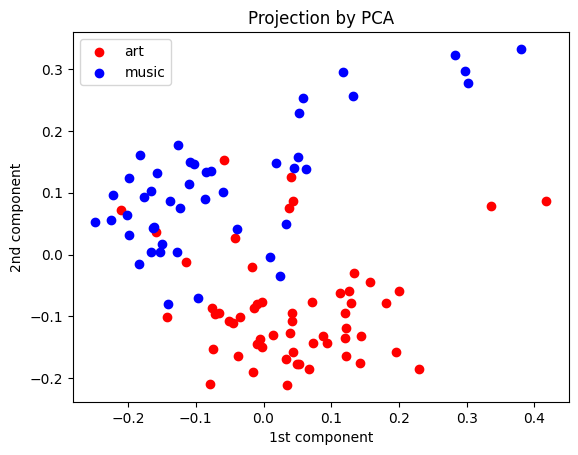

In [6]:
reds = nyt_df["class.labels"] == "art"
blues = nyt_df["class.labels"] == "music"

plt.figure()
plt.scatter(nyt_decomposed[np.array(reds), 0], nyt_decomposed[np.array(reds), 1], c="red")
plt.scatter(nyt_decomposed[np.array(blues), 0], nyt_decomposed[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(["art", "music"])
plt.show()

Otrzymany wykres wizulanie potwierdza wnioski punktów 4-6. Na prawo (większa wartość wektora cech zrzutowanego na pierwszy komponent wiodący) mamy artykuły dotyczące muzyki jak i sztuki, czyli prawdopobnie mają one dużo przyimków i stosunkowo mało wyrzów wskazujących na sztukę lub muzykę. Takich artykułów jest jdnak mało, gdyby je zignorować, to widać, że po prawej stronie jest więcej artykułów dotyczących sztuki, a po lewej, muzyki (jak w punktach 4 i 5). 

Podobnie jest w przypadku drugiego komponentu wiodącego. Wyżej na wykresie (czyli artykuł ma słowa majace duże wartości po zrzutowaniu na drugi komponent) są artykuły dotyczace muzyki, a niżej na wykresie są artykuły dotyczące sztuki (jak w punkcie 6.). 

Poza tym, już wykorzystując dane zrzutowane na dwa pierwsze komponenty wiodące, można wyznaczyć nienajgorszą granicę decyzyjną.

## 8.

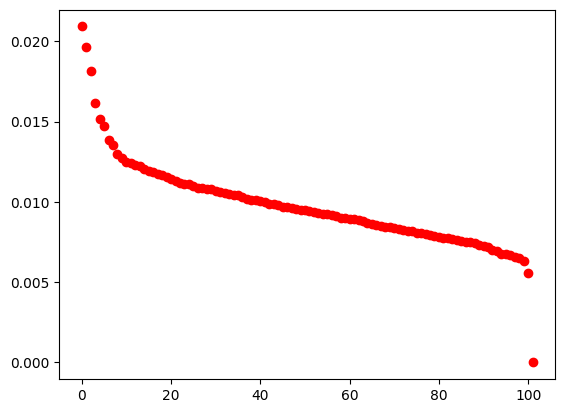

0.15773478029003493


In [7]:
_variance_ratio = nyt_pca.explained_variance_ratio_
plt.plot(_variance_ratio, "ro")
plt.show()
print(sum(_variance_ratio[0:10]))

Zachowane zostaje niecałe 16% wariancji. Po powrotnym rzutowaniu za pomocą pierwszych 10 komponentów, otrzymane dane miałby niecałe 16% wariancji oryginalnych danych.

# Analiza zbioru danych 04Cars

## 1.-2.

In [8]:
# load data
cars_df = pd.read_csv("./data/04cars-data.csv", header=0)
cars_df

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,1,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,1,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,0,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,0,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [9]:
# take last 11 columns
cars_data = cars_df.iloc[:,-11:].values

In [10]:
# scale data
scaled_cars_data = StandardScaler().fit_transform(cars_data)

## 3.

In [11]:
# pca
cars_pca = PCA()
cars_decomposed = cars_pca.fit_transform(scaled_cars_data)

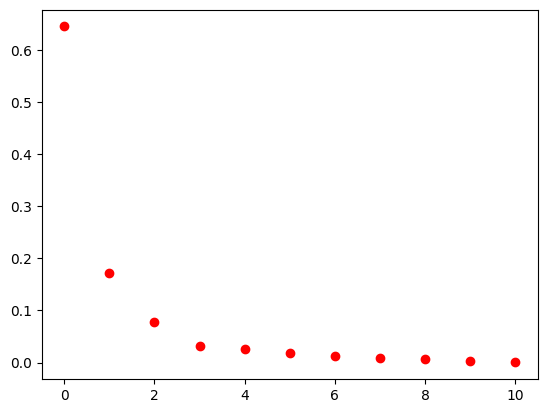

Reduction to 2 dims: 81.71421089701893% of varaince
Reduction to 3 dims: 89.43901348942343% of varaince


In [12]:
_variance_ratio = cars_pca.explained_variance_ratio_

plt.plot(_variance_ratio, "ro")
plt.show()

print(f"Reduction to 2 dims: {sum(_variance_ratio[:2]) * 100}% of varaince")
print(f"Reduction to 3 dims: {sum(_variance_ratio[:3]) * 100}% of varaince")

## 4.

In [13]:
cars_attributes = list(cars_df.columns.values[-11:])

_ordered_by_1st_component = order_by_component(cars_attributes, cars_pca.components_[0])
_ordered_by_2nd_component = order_by_component(cars_attributes, cars_pca.components_[1])

pd.DataFrame({
    "Attributes ordered by 1st component": _ordered_by_1st_component,
    "Attributes ordered by 2nd component": _ordered_by_2nd_component,
})

,Attributes ordered by 1st component,Attributes ordered by 2nd component
0,"(Engine Size (l), -0.347080492025201)","(Wheel Base, -0.4181771069592045)"
1,"(Weight, -0.3363293669404882)","(Len, -0.40841138066875493)"
2,"(Cyl, -0.3341887576286373)","(Width, -0.31289135016250724)"
3,"(HP, -0.31860225848402945)","(Weight, -0.16746357154787056)"
4,"(Width, -0.2960545914170612)","(Engine Size (l), -0.015347186463713414)"
5,"(Wheel Base, -0.2662100335710543)","(Hwy MPG, -0.010964460145348812)"
6,"(Retail Price, -0.2637504434440343)","(City MPG, -0.0033659357616593055)"
7,"(Dealer Cost, -0.262318638753095)","(Cyl, 0.07803201087501876)"
8,"(Len, -0.25679018767068235)","(HP, 0.2922134761391825)"
9,"(Hwy MPG, 0.3065886385804443)","(Retail Price, 0.4685086975025391)"


Największe elementy pierwszego komponentu wiodącego dotyczą spalania na autostradzie i w mieście, a najmniejsze wiążą się z wielkością samochodu i z wielkością oraz mocą silnika. Oznacza to, że ten komponent wiodący rozróżnia auta na z jednej strony małe samochody miejske z małym spalaniem, a zdrugiej strony na duże samochdy, lub z dużymi silnikami, czyli o dużym spalaniu.

Największe elementy drugiego komponentu wiodącego dotyczą ceny samochodów, a także mocy silnika, natomiast najmniejsze dotyczą atrybutów związanych z dużymi samochodami. Można przypuszczać, że ten komponent wiodący rozdziela auta ma sportowe (duża moc), drogie maszyny i na tanie amerykańśkie pick-upy.

Wartości bliskie zeru oznaczają, że atrybut powiązany z nimi nie ma wpływu na to, jak zrzutowane zostaną dane na komponent. Widać to przy drugim komponencie wiodącym - wartości bliskie zeru mają atrybuty dotyczące spalania, wysokie spalanie mają za równo auta sportowe, jak i pick-upy, a samochody o niskim spalaniu nie są tutaj na żadnym z końców tej "skali". Bardzo prawdopodobne że atrybuty te mają duży wpływ na rzutowanie na inny, "prostopadły" komponent wiodący, na przykład atrybuty dotyczące spalania mają dużą wagę w rzutowaniu na pierwszy komponent wiodący.

## 5.-6.

In [14]:
def pc_plot(score, coeff, names=None, labels=None):
    plt.figure(figsize=(10,10))
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    x = score[:, 0]
    y = score[:, 1]
    x /= (x.max() -x.min())
    y /= (y.max() -y.min())

    plt.scatter(x, y)
    if names:
        for i, name in enumerate(names):
            plt.annotate(name, (x[i], y[i]), size=5)
    
    if labels:
        for i, label in enumerate(labels):
            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="r", alpha=0.3)
            plt.text(coeff[i, 0], coeff[i, 1], label, color="g", ha="center")
            
    plt.show()

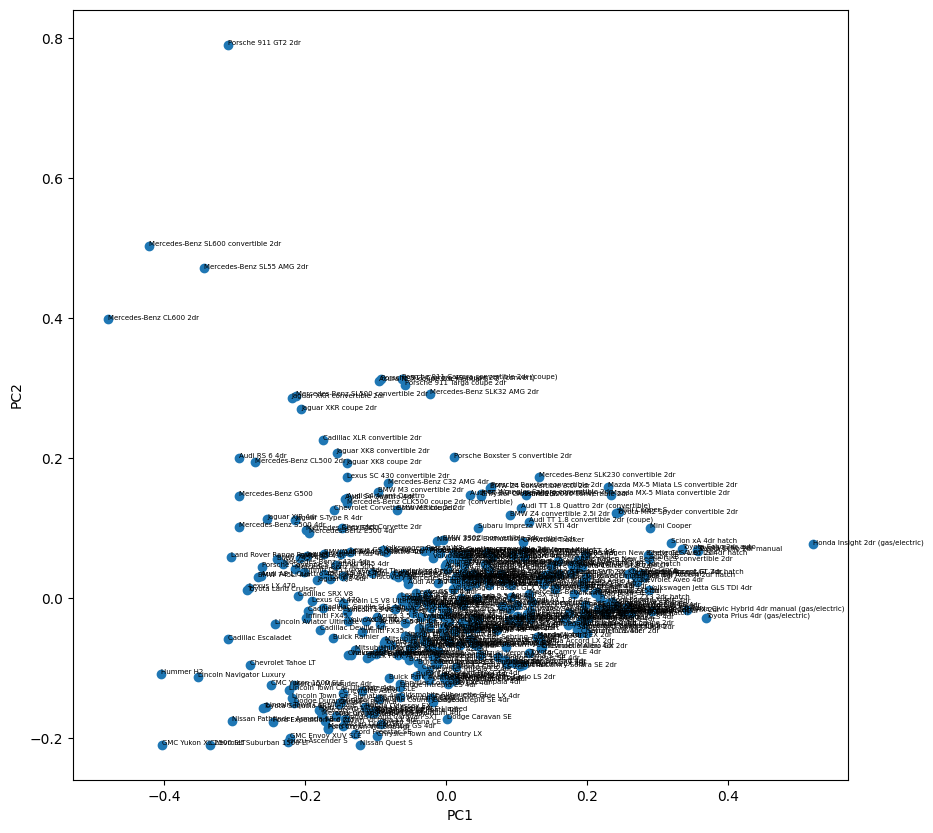

In [15]:
pc_plot(cars_decomposed, cars_pca.components_.T, names=list(cars_df["Vehicle Name"]))

Otrzymany wykres potwierdza wnioski płynące z punktu 4. Pierwszy komponent wiodący rozdziela auta ze względu na spalanie (po lewej, małe samochody miejskie, po prawej, samochody z dużym spalaniem: sportowe i pick-upy), a drugi komponent rozdziela samochody ze względu na cenę (na górze, po lewej, samochody sportowe, na dole, po lewej, tanie pick-upy). Ciekawym spostrzeżeniem jest to, że dane ułożyły się w trójkąt, którego dwa kąty przezaczone są na samochody o atrybutach z wysokimi wartościami w którymś z komponetów wiodących.

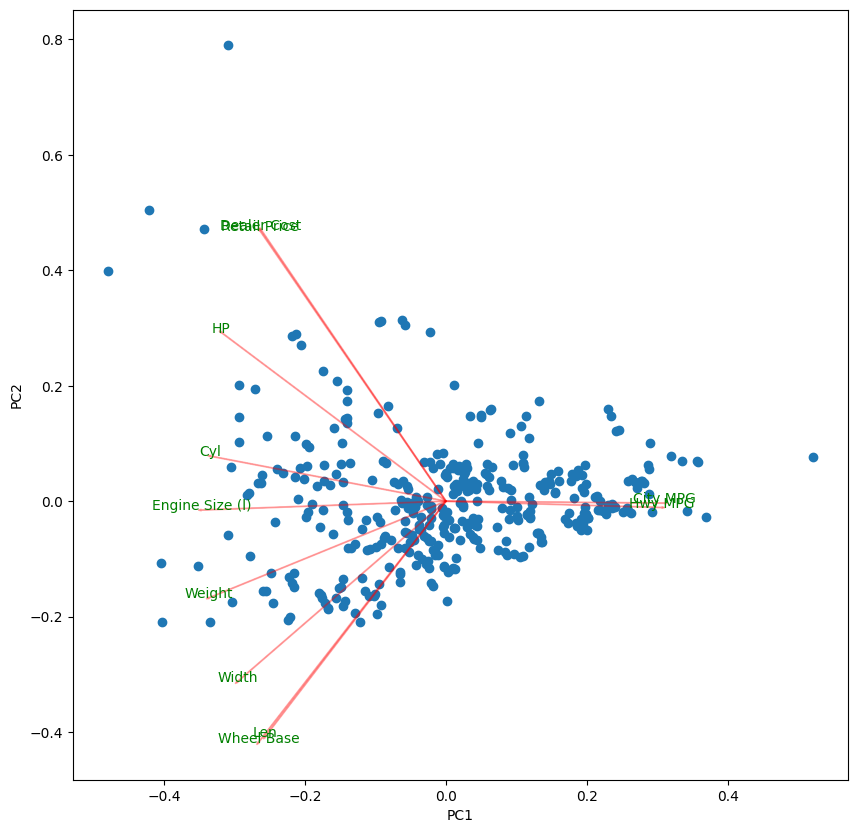

In [16]:
pc_plot(cars_decomposed, cars_pca.components_.T, labels=cars_attributes)

Taka wizualizacja pokazuje korelację między poszczególnymi atrybutami - tym mniejszy kąt, tym większa korelacja. Widać na przykład, że rozmiar silnika jest powiązny z liczbą cylindrów, ta z mocą silnika, a moc silnika z ceną. Widać też, że wielkość silnika jest ujemnie skorelowana ze spalaniem - tym większy silnik, tym większe spalanie (mniejsza liczba mil na jednym galonie) - kąt jest bardzo wypukły.

# Zadanie dodatkowe: budowa eigenfaces w oparciu o zbiór danych LFW

## 1.-2.

In [17]:
# load data
lfw_people = fetch_lfw_people(data_home="../../../fetched/", min_faces_per_person=50)
lfw_data = lfw_people.data
lfw_targets = lfw_people.target

print(f"number of images: {lfw_data.shape[0]}")
print(f"number of people: {len(set(lfw_targets))}")

number of images: 1560
number of people: 12


In [18]:
# split dataset
lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test = train_test_split(lfw_data, lfw_targets, test_size=0.3, random_state=102)

## 3.-4.

In [19]:
# pca
lfw_pca = PCA()
lfw_pca.fit(lfw_X_train)

PCA()

In [20]:
# results of trainings
def get_results(clf, X, y_true, description):
    y_pred = clf.predict(X)
    # accuracy
    confusion = confusion_matrix(y_true, y_pred)
    targets_acc = confusion.diagonal() / confusion.sum(axis=1)
    total_acc = np.sum(y_true == y_pred) / len(y_true)
    # precisin, recall, f1-score
    targets_precision, targets_recall, targets_f1, _ = precision_recall_fscore_support(y_true, y_pred)
    total_precision, total_recall, total_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="micro")
    # result df
    return pd.DataFrame({
        f"acc {description}": list(targets_acc) + [total_acc],
        f"precision {description}": list(targets_precision) + [total_precision],
        f"recall {description}": list(targets_recall) + [total_recall],
        f"f1 {description}": list(targets_f1) + [total_f1],
    })


lfw_results_names = pd.DataFrame({
    "name": [f"person {person_id}" for person_id in range(len(lfw_people.target_names))] + ["total"]
})

# trainings
def run_trainings(pca, X_train, X_test, y_train, y_test, n_dims):
    trainings_results = lfw_results_names.copy()
    X_train_decomposed = pca.transform(X_train)[:, :n_dims]
    X_test_decomposed = pca.transform(X_test)[:, :n_dims]
    for clf in (SVC(), MLPClassifier(hidden_layer_sizes=(100, 100))):
        clf.fit(X_train_decomposed, y_train)
        trainings_results = trainings_results.join(
          get_results(clf, X_test_decomposed, y_test, f"{type(clf).__name__} {n_dims} dims")
        )
    return trainings_results

In [21]:
# 100 dims
run_trainings(lfw_pca, lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test, 100)

c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,name,acc SVC 100 dims,precision SVC 100 dims,recall SVC 100 dims,f1 SVC 100 dims,acc MLPClassifier 100 dims,precision MLPClassifier 100 dims,recall MLPClassifier 100 dims,f1 MLPClassifier 100 dims
0,person 0,0.217391,0.833333,0.217391,0.344828,0.695652,0.800000,0.695652,0.744186
1,person 1,0.727273,0.558140,0.727273,0.631579,0.787879,0.732394,0.787879,0.759124
2,person 2,0.484848,0.727273,0.484848,0.581818,0.727273,0.774194,0.727273,0.750000
3,person 3,0.957317,0.613281,0.957317,0.747619,0.902439,0.860465,0.902439,0.880952
4,person 4,0.468750,0.750000,0.468750,0.576923,0.875000,0.717949,0.875000,0.788732
5,person 5,0.375000,0.818182,0.375000,0.514286,0.666667,0.761905,0.666667,0.711111
6,person 6,0.000000,0.000000,0.000000,0.000000,0.727273,0.470588,0.727273,0.571429
7,person 7,0.375000,1.000000,0.375000,0.545455,0.812500,0.764706,0.812500,0.787879
8,person 8,0.000000,0.000000,0.000000,0.000000,0.222222,0.800000,0.222222,0.347826
9,person 9,0.600000,0.923077,0.600000,0.727273,0.900000,0.782609,0.900000,0.837209


In [22]:
# 50 dims
run_trainings(lfw_pca, lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test, 50)

c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,name,acc SVC 50 dims,precision SVC 50 dims,recall SVC 50 dims,f1 SVC 50 dims,acc MLPClassifier 50 dims,precision MLPClassifier 50 dims,recall MLPClassifier 50 dims,f1 MLPClassifier 50 dims
0,person 0,0.217391,0.833333,0.217391,0.344828,0.608696,0.608696,0.608696,0.608696
1,person 1,0.696970,0.528736,0.696970,0.601307,0.803030,0.716216,0.803030,0.757143
2,person 2,0.454545,0.714286,0.454545,0.555556,0.636364,0.636364,0.636364,0.636364
3,person 3,0.963415,0.607692,0.963415,0.745283,0.871951,0.851190,0.871951,0.861446
4,person 4,0.406250,0.619048,0.406250,0.490566,0.781250,0.735294,0.781250,0.757576
5,person 5,0.250000,0.750000,0.250000,0.375000,0.500000,0.666667,0.500000,0.571429
6,person 6,0.000000,0.000000,0.000000,0.000000,0.636364,0.500000,0.636364,0.560000
7,person 7,0.312500,1.000000,0.312500,0.476190,0.812500,0.866667,0.812500,0.838710
8,person 8,0.000000,0.000000,0.000000,0.000000,0.277778,0.500000,0.277778,0.357143
9,person 9,0.650000,0.928571,0.650000,0.764706,0.950000,0.863636,0.950000,0.904762


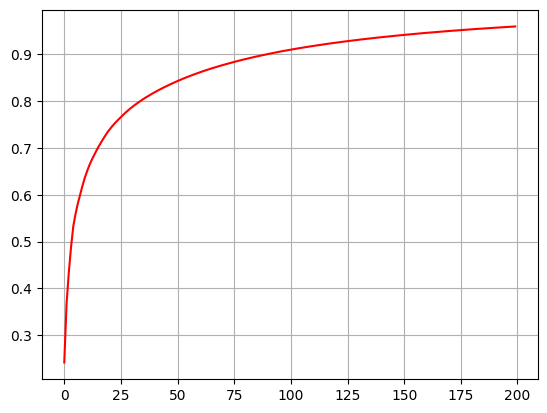

In [23]:
# scree plot
plt.plot(np.cumsum(lfw_pca.explained_variance_ratio_)[:200], c="red")
plt.grid()
plt.show()

In [24]:
# elbow (35 dims)
run_trainings(lfw_pca, lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test, 35)

c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,name,acc SVC 35 dims,precision SVC 35 dims,recall SVC 35 dims,f1 SVC 35 dims,acc MLPClassifier 35 dims,precision MLPClassifier 35 dims,recall MLPClassifier 35 dims,f1 MLPClassifier 35 dims
0,person 0,0.086957,0.666667,0.086957,0.153846,0.695652,0.800000,0.695652,0.744186
1,person 1,0.696970,0.516854,0.696970,0.593548,0.803030,0.779412,0.803030,0.791045
2,person 2,0.484848,0.727273,0.484848,0.581818,0.636364,0.807692,0.636364,0.711864
3,person 3,0.951220,0.586466,0.951220,0.725581,0.890244,0.793478,0.890244,0.839080
4,person 4,0.406250,0.722222,0.406250,0.520000,0.718750,0.696970,0.718750,0.707692
5,person 5,0.166667,0.666667,0.166667,0.266667,0.458333,0.550000,0.458333,0.500000
6,person 6,0.000000,0.000000,0.000000,0.000000,0.454545,0.454545,0.454545,0.454545
7,person 7,0.312500,1.000000,0.312500,0.476190,0.875000,0.700000,0.875000,0.777778
8,person 8,0.000000,0.000000,0.000000,0.000000,0.277778,0.500000,0.277778,0.357143
9,person 9,0.600000,0.923077,0.600000,0.727273,0.900000,0.818182,0.900000,0.857143


Zastoswano klasyfikator SVM oraz MLP z dwiema warstwami po 100 neuronów. 

Zasadniczo MLP dawał lepsze wyniki w każdym z trzech przypadków.

Njalpesze wyniki były dla redukcji do 100, wymiarów, najgorsze dla redukcji do 32 wymairów (około 80% zachowanej wariancji zbioru wejściowego). Widać, że jakość wytrenowanych klasyfikatorów zależy od procent zachowanej wariancji. Od około 30 wymiarów każdy kolejny wymir dodaje już bardzo mało, szczegołnie dobrze  widać gdy porówna się klasyfikatory dla 100 i 50 wymiarów – nie ma dużego spadku w jakości dla klasyfikatorów trenowanych na 50 wymiarach (około 3%). 


## 5.

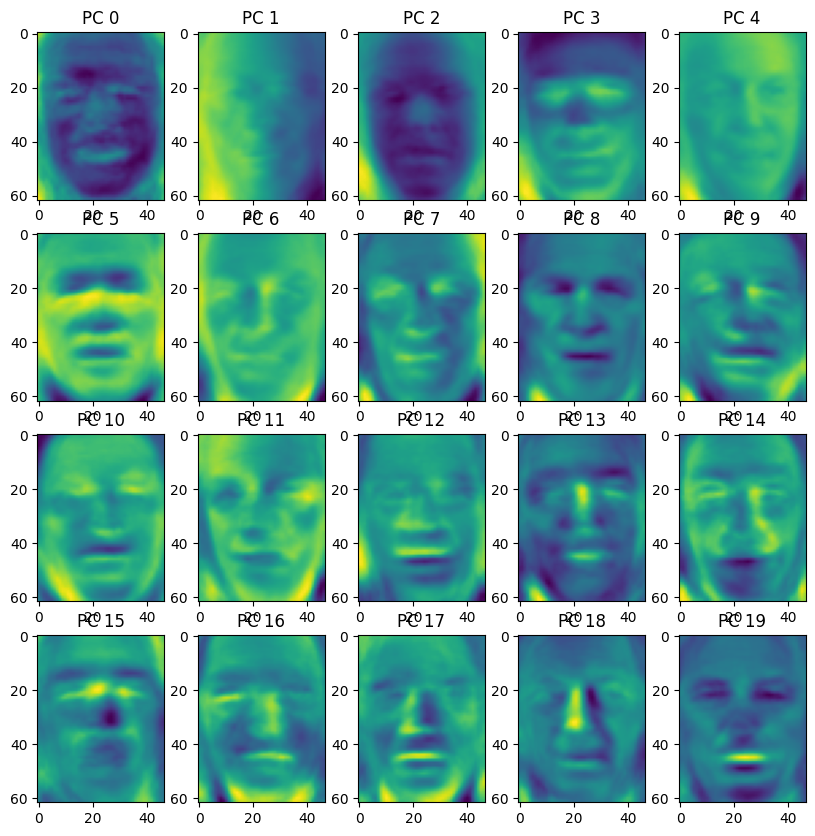

In [25]:
# eigenfaces
n_rows, n_cols = 4, 5
n = n_rows * n_cols

eigenfaces = lfw_pca.components_[:n].reshape((n, lfw_people.images.shape[1], lfw_people.images.shape[2]))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        axs[row, col].imshow(eigenfaces[i])
        axs[row, col].set_title(f"PC {i}")
plt.show()

Działanie eigenfaces w kontekście redukcji wymiarowości  wcześniej  nie  widzianego zdjęcia można interpretować tak, że dany komponent będzie redukowł obszary, które są jaśniejsze na jego eigenface na danym obrazku. Widać, że każdy kolejny komponent redukuje wymiarowość innych obszarów obrazków. Widać też, że eigenfaces często dotyczą konkretnych „częścu” redukowanych obrazkoów, na przykład ust.

# Zadanie dodatkowe: Kernel PCA

## Eksperyment opisany w artykule

In [26]:
# gemerate spheres
def make_sphere(dims: int, radius: float, noise: float, n_elements: int):
    sphere = np.random.rand(n_elements, dims) -0.5
    for i in range(n_elements):
        length = np.linalg.norm(sphere[i])
        sphere[i] *= np.random.normal(radius, noise) / length 
    return sphere


inside = make_sphere(3, 40, 1, 500)
outside = make_sphere(3, 100, 1, 500)

two_spheres = np.concatenate([inside, outside])
np.random.shuffle(two_spheres)

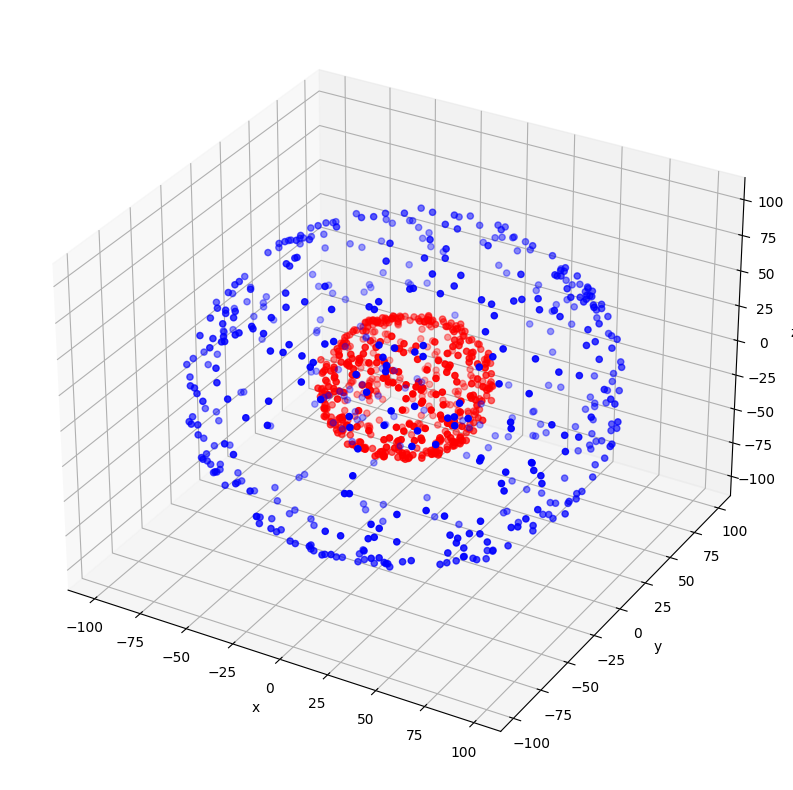

In [27]:
# 3d scatter
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(inside[:, 0], inside[:, 1], inside[:, 2], c="red")
ax.scatter(outside[:, 0], outside[:, 1], outside[:, 2], c="blue")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

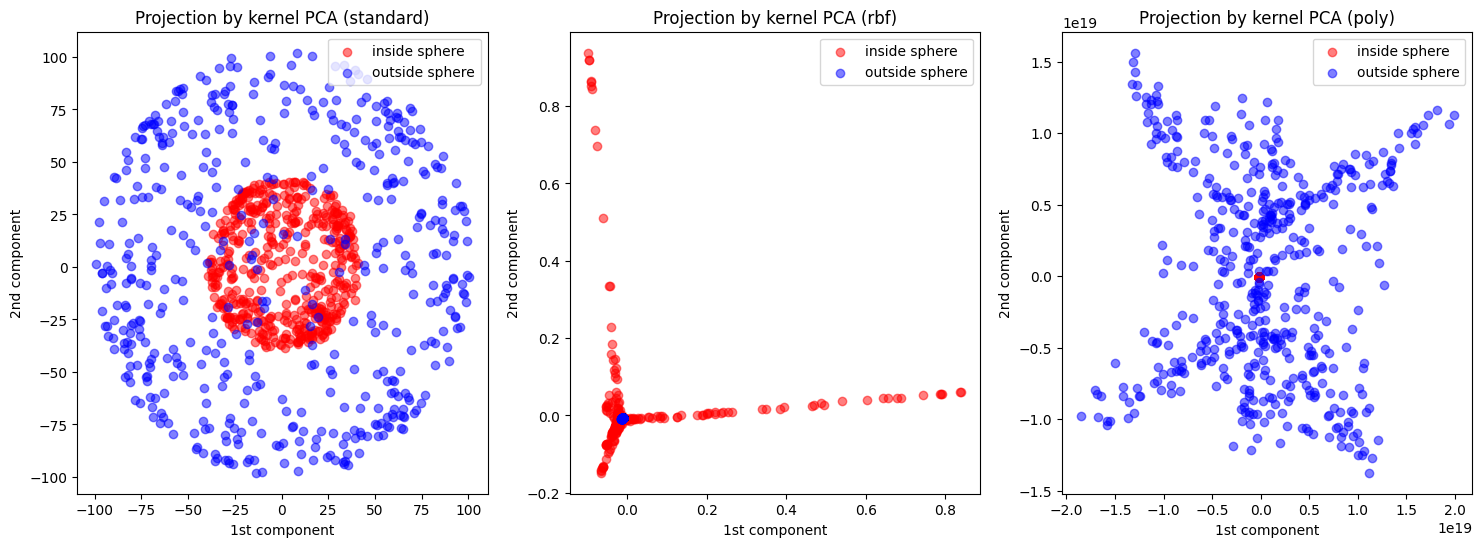

In [28]:
# kernel pca for spheres

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

pcas = (
    PCA(n_components=2), 
    KernelPCA(n_components=2, kernel="rbf", gamma=0.02), 
    KernelPCA(n_components=2, kernel="poly", degree=11, coef0=0),
)

for ax, pca in zip(axs, pcas):
    pca.fit(two_spheres)
    inside_decomposed = pca.transform(inside)
    outside_decomposed = pca.transform(outside)

    ax.scatter(inside_decomposed[:, 0], inside_decomposed[:, 1], c="red", alpha=0.5)
    ax.scatter(outside_decomposed[:, 0], outside_decomposed[:, 1], c="blue", alpha=0.5)

    kernel = pca.kernel if hasattr(pca, "kernel") else "standard"
    ax.set_title(f"Projection by kernel PCA ({kernel})")
    ax.set_xlabel("1st component")
    ax.set_ylabel("2nd component")
    ax.legend(["inside sphere", "outside sphere"])

plt.show()

Kernel PCA radzą sobie w przypadku danyh mieliniowych, w przeciwieństwie do standardowego PCA.

## Kernel PCA dla zbioru danych LFW, klasyfikacja

In [29]:
# kernel pca (poly)
lfw_kernel_pca = KernelPCA(kernel="poly", degree=7)
lfw_kernel_pca.fit(lfw_X_train)
run_trainings(lfw_kernel_pca, lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test, 100)

c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,name,acc SVC 100 dims,precision SVC 100 dims,recall SVC 100 dims,f1 SVC 100 dims,acc MLPClassifier 100 dims,precision MLPClassifier 100 dims,recall MLPClassifier 100 dims,f1 MLPClassifier 100 dims
0,person 0,0.130435,0.750000,0.130435,0.222222,0.782609,0.782609,0.782609,0.782609
1,person 1,0.696970,0.541176,0.696970,0.609272,0.803030,0.854839,0.803030,0.828125
2,person 2,0.424242,0.736842,0.424242,0.538462,0.606061,0.714286,0.606061,0.655738
3,person 3,0.951220,0.567273,0.951220,0.710706,0.902439,0.875740,0.902439,0.888889
4,person 4,0.375000,0.750000,0.375000,0.500000,0.875000,0.736842,0.875000,0.800000
5,person 5,0.166667,1.000000,0.166667,0.285714,0.791667,0.904762,0.791667,0.844444
6,person 6,0.000000,0.000000,0.000000,0.000000,0.545455,0.666667,0.545455,0.600000
7,person 7,0.250000,1.000000,0.250000,0.400000,0.875000,0.608696,0.875000,0.717949
8,person 8,0.000000,0.000000,0.000000,0.000000,0.388889,0.777778,0.388889,0.518519
9,person 9,0.600000,1.000000,0.600000,0.750000,0.950000,0.791667,0.950000,0.863636


In [30]:
# kernel pca (rbf)
lfw_kernel_pca = KernelPCA(kernel="rbf", gamma=0.0001)
lfw_kernel_pca.fit(lfw_X_train)
run_trainings(lfw_kernel_pca, lfw_X_train, lfw_X_test, lfw_y_train, lfw_y_test, 100)

c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Dev\jupiterb\agh-data-science\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,name,acc SVC 100 dims,precision SVC 100 dims,recall SVC 100 dims,f1 SVC 100 dims,acc MLPClassifier 100 dims,precision MLPClassifier 100 dims,recall MLPClassifier 100 dims,f1 MLPClassifier 100 dims
0,person 0,0.217391,0.833333,0.217391,0.344828,0.565217,0.722222,0.565217,0.634146
1,person 1,0.727273,0.551724,0.727273,0.627451,0.787879,0.753623,0.787879,0.770370
2,person 2,0.484848,0.727273,0.484848,0.581818,0.636364,0.636364,0.636364,0.636364
3,person 3,0.957317,0.615686,0.957317,0.749403,0.908537,0.861272,0.908537,0.884273
4,person 4,0.468750,0.750000,0.468750,0.576923,0.656250,0.583333,0.656250,0.617647
5,person 5,0.375000,0.818182,0.375000,0.514286,0.583333,0.736842,0.583333,0.651163
6,person 6,0.000000,0.000000,0.000000,0.000000,0.090909,0.333333,0.090909,0.142857
7,person 7,0.375000,1.000000,0.375000,0.545455,0.750000,0.631579,0.750000,0.685714
8,person 8,0.000000,0.000000,0.000000,0.000000,0.444444,0.666667,0.444444,0.533333
9,person 9,0.600000,0.923077,0.600000,0.727273,0.900000,0.750000,0.900000,0.818182


Klasyfikatory trenowane na danych zredukowanych przez kernel PCA, po odpowiednim dobraniu ich hiperparametrów, radzą sobie opodobnie do klasyfikatorów trenowanych na danych zredukowanych przez zwykłe PCA. Przyszpuczam, że jest tak dlatego, że: 
- nie udało mi się dobrze dobrać hiperparametrów.
- za róno SCV oraz MLP z pakietu sk-learn domyślnie powinny sonie radzić z danymi nieliowymi: SVC ma domyślny kernel RBF, a MLP nieliową funkcję aktyacji ReLU, więc urzycie kernel PCA może za wiele nie pomagać.